https://www.renarepenning.com/weplaynoladata/

## Rena Repenning and Eddy Salazar

# Project Plan


## *Updated by rena 12/8 4:30p*
https://docs.google.com/document/d/1V47KzrvPq6YNUBH-4N6mWy_EH556zvRhAlRZV9M2-sM/edit


### Data 
1. We Play Data [<sup>1</sup>](#fn1)
    Provided by Christine Neely

### Explanation & Model Proposition
We are inspired by The We Play center's mission: "to offer a safe place to play while engaging in activities that promote brain development." 
Melanie Richardson expressed a need for statistical evidence of We Play's importance.

First, we manually removed empty columns and rows from the five excel files.
Then, we broke apart sheets to make data frames adressing a single concern. During service learning Melanie and Christine heard our Milestone Two plan and asked for **XXXXXXX**

**XXX explain four surveys are weird time frames, sameish columns, and then fam survey is vaugley similar XX**

After looking at all the available data *we intend to model*:
* Use data regarding existing and desired parenting skills to inform WePLAY's curriculum
* Identify why people chose WePLAY over alternative forms of childcare/early education


Graphing pie charts is difficult, and code intensive, in pandas and matplotlib. Writing three of our own ETL functions increased our efficiency and cutdown on lines of code. We added functions to plot pie charts easily, grab column labels, and take numerical series and plot a bar chart and print summary stats. These will allow us to analyze the rest of the data in a much more efficient fashion.

### Collaboration Plan
Rena and Eddy will utilize this repository to simultaneously edit the project. 
We plan on connecting over Zoom as needed and keeping constant communication over instant message. Also, we are both able to meet after class on Thursdays.
When convinient, we will export notebooks to Google Colabs to support simultaneous editing. 
(This is easily done using a Colabs Chrome extension).
While re organizing our final product we used a GoogleDoc to simultaneouslt outline and plan.

### Footnotes
<span id="fn1"> 1. WePLAY data was last downloaded on October 25th, 2021. We could not use a live link because of spaces in filenames.</span>

# Exploring WePLAY Survey Results

Provided by Christine Neely from WePlay by Training Grounds nola. Data last accessed on October 25th.

##### Imports as needed

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
!pip3 install openpyxl # package to open xlsx files

     |████████████████████████████████| 242 kB 2.0 MB/s eta 0:00:01


Separate paths to accomodate for our local environments

In [6]:
renapath = "../notebooks/_data/WePlayData/CleanedWPC"
edpath = "./_data/WePlayData/CleanedWPC"

# PATH -- set path variable 
path = renapath  # path to manually cleaned excels

# Extraction, Transform, and Loading Key Functions

#### **plotPies**

* df= dataframe to graph
* cols = the df's columns to be used as titles; can pass in `getLabels(df)`
* labels = labels for sections
* allLabelsSame = if True, make a list of labels' to get same format for all label inputs
* isNAct = if we use .isna() before value counts
For now, we will leave legends repeating because that function pairs names and values correctly.

#### printCatBars
* df
* key
* att (like df.key, but pandas doesn't allow .key in place of .attribute to calculate summary stats
* printStats=True

#### printHorizBars
* df 
* key

#### plotSection
* cols
* i1
* i2
* plotBars="key"
* plotBarsHoriz=False
* pie=True

#### **getLabels**
* returns a list of lists of values for each column, using pandas.unique

In [7]:
#     cs=cm.Set1(np.arange(40)/40.) # for colors  colors=cs,


#Pie chare citation: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
import math
def plotPies(df, labels, allLabelsSame, isNAct, ishoriz=True):
    cols = df.columns
    # create matplotlib axis
    if ishoriz:
        fig1, ax1 = plt.subplots(nrows=1,ncols=len(cols),figsize=(20,15))
    else:
        fig1, ax1 = plt.subplots(nrows=len(cols),ncols=1,figsize=(20,15))
        
    # if all labels are the same we make a cols long list of them --> accomodate dif label inputs
    if allLabelsSame:
        labels = [labels]*len(cols)
    keys = [] #print key above all instead of individually
    for i, c in enumerate(df.columns): # incanse our graph titles are going to be differend
        if isNAct:#if we want to plot using is na
            wedges = ax1[i].pie(df[c].isna().value_counts(), autopct='%1.1f%%', shadow=True, startangle=90)#labels=labels[i],
        else:
            wedges = ax1[i].pie(df[c].value_counts(), autopct='%1.1f%%', shadow=True, startangle=90)#labels=labels[i],
        
        ax1[i].set_title(str(i+1))
        if isinstance(cols[i],str):
            keys += [str(i+1) +". "+ cols[i]]
        else:
            keys += [str(i+1) +". "+ cols[i][0]]
        
        ax1[i].axis('equal')
        # label individually
        if allLabelsSame == False:
            ax1[i].legend(wedges[0], labels[i],
                  title="Legend", # must plot a unique legend for each to keep value/label pairs uniform
                  loc="upper left",
                  bbox_to_anchor=(1, 0, 0.5, 1))
    # label for all to save space
    if allLabelsSame:
        ax1[0].legend(wedges[0], labels[0],
                      title="Legend", # must plot a unique legend for each to keep value/label pairs uniform
                      loc="upper left",
                      bbox_to_anchor=(1, 0, 0.5, 1))
    print("KEYS:")
    for k in keys:
        print(k)
    plt.show()
    


In [8]:
def getLabels(df):    
    labels = ["x"]*len(df.columns)
    for i, c in enumerate(df.columns):
        labels[i] = df[c].unique()
    return labels
    # will return nan

### Displaying barchart for numeric variables

In [9]:
def printCatBars(df, key, att, printStats=True):
    # att -- > is df.col_name attribute for calling summary stat functions
    '''type(df[key].mean())'''
    p = df[key].value_counts()
    p.sort_index(inplace=True)
    p.plot.bar(align="center", color="pink")
    
    if printStats: #adjust for qualitative data
        # convert numeric values
        df[key].apply(pd.to_numeric, errors='coerce')
        print("SUMMARY STATS\n","AVG: ", att.mean()[0],"\nMax,Min: ",att.min()[0],",",att.max()[0])

def printHorizBars(df, key):
    p = df[key].value_counts()
    p.sort_index(inplace=True)
    p.plot.barh(align="center", color="pink")
    

### Plotting batches of aggregated data, with option to add in bar chart

In [10]:
# add here once finished

# Incoming Family Data
### Four spreadsheets aggregated
Explain method, etc

In [11]:
# poss store the column names in the excel to avoid passing label??

# plotBars -> plots a bar graph if we send in col, attribute
def plotSection(cols, i1, i2, plotBars="key", plotBarsHoriz=False, pie=True):
    df = allIncoming.iloc[1:, i1:i2]
    df.columns = [cols]
    
    if (pie) and (plotBarsHoriz==False):
        plotPies(df, getLabels(df), False, False, True)
    
    if plotBars != "key":
        if plotBarsHoriz == False:
            print("Taking a closer look at ",plotBars,":")
            printCatBars(df, plotBars, df[plotBars], False)
        else:
            printHorizBars(df, plotBars)

In [67]:
# JULY BATCH
incomingjuly2019 = pd.read_excel(path + "IncomingParentReflection-July2019" + ".xlsx")
incomingjuly2019.drop([1], axis=0, inplace = True) #delete row full of test reponses
# NOV BATCH
incomingnov2019 = pd.read_excel(path + "IncomingParentReflection-November2019" + ".xlsx")
incomingnov2019.drop([0], axis=0, inplace = True)
# 2020 BATCH
incoming2020 = pd.read_excel(path + "IncomingParentReflectionForm2020" + ".xlsx")
incoming2020.drop([0], axis=0, inplace = True)
# UNDATED BATCH
incoming_data_undated = pd.read_excel(path + "IncomingParentReflection" + ".xlsx")
pd.set_option('display.max_columns',None) #display all columns
# Create DF of all similar surveys
allIncoming = pd.concat([incomingjuly2019, incomingnov2019.iloc[1:,:], incoming2020.iloc[1:,:], incoming_data_undated.iloc[1:,:]], ignore_index=True)
            
print("Notes: -- Adults means over 19  -- Children means under 18 -- Resp = Respondant\n")


Notes: -- Adults means over 19  -- Children means under 18 -- Resp = Respondant



In [81]:
from datetime import datetime
# '''this only casts as nans '''
# allIncoming.Date.unique() #= allIncoming.Date.str
allIncoming["Date"]

#plotSection("Date", 0, 1, pie=False, plotBars="Date", plotBarsHoriz=True) 

0                     Date
1      2019-08-20 00:00:00
2      2019-08-08 11:44:40
3      2019-08-08 10:33:01
4      2019-08-07 13:07:16
              ...         
141                    NaN
142                    NaN
143                    NaN
144                    NaN
145                    NaN
Name: Date, Length: 146, dtype: object

KEYS:
1. Resp_Gender
2. Resp_Age
3. Resp_Race


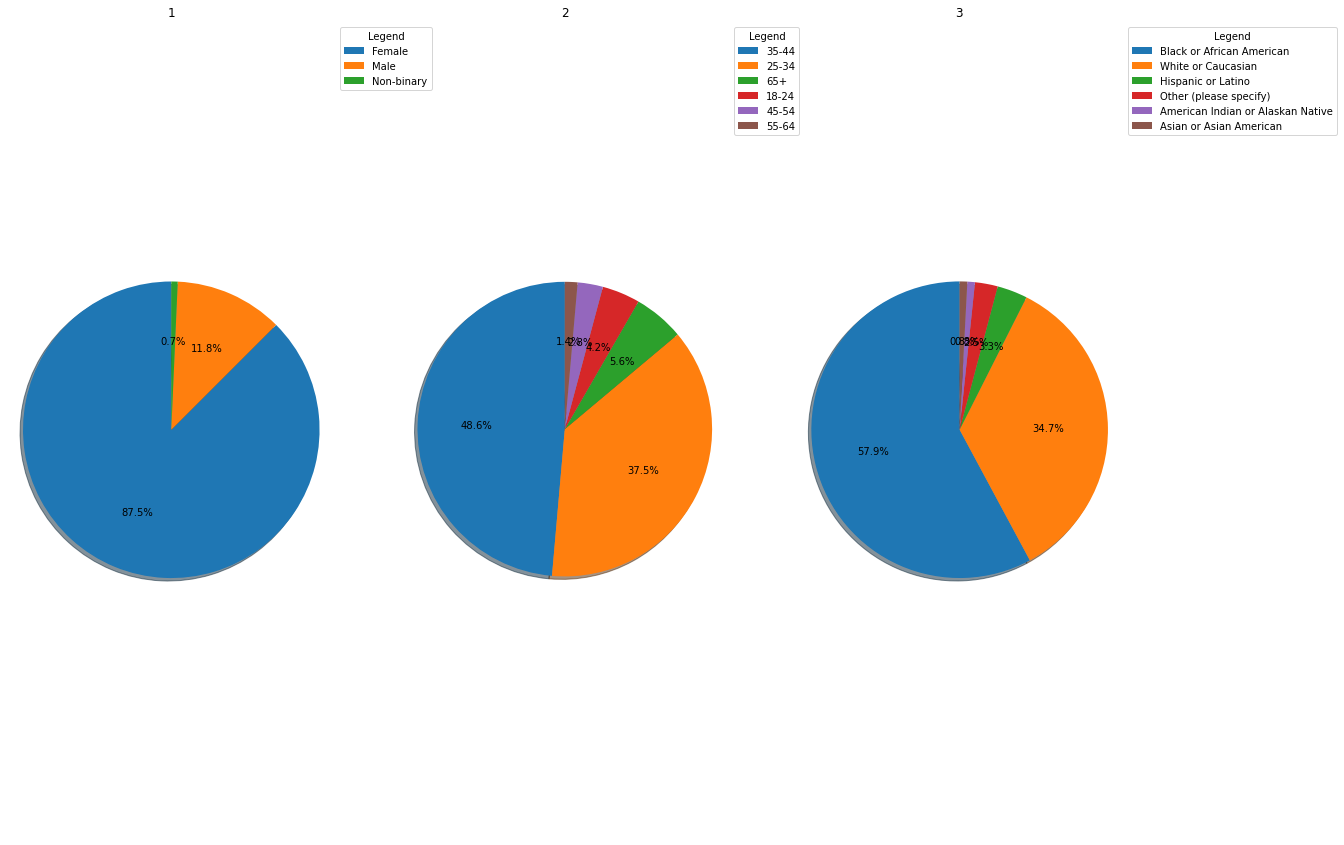

Taking a closer look at  Resp_Age :


'Survey Respondant Info'

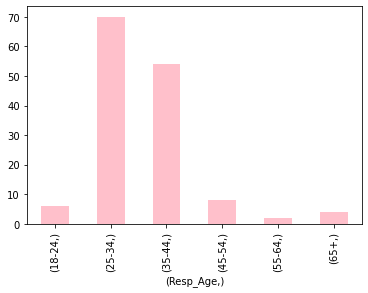

In [33]:
plotSection(["Resp_Gender", "Resp_Age", "Resp_Race"], 1, 4, "Resp_Age")
'''Survey Respondant Info'''

In [ ]:
#plotSection(["Adults", "Children", "Zip"], 5, 8, "Zip")
'''Home info: # Adults, # Children, Zip'''

In [ ]:
#plotSection(["Income", "Highest Level of education"], 9, 11)
'''Respondant Demographic'''

In [ ]:
# print("Q: Which of the following are reasons that you have not applied for childcare?\nPlease select all that apply. (\"No\" label means option wasn't selected)")
# c = [
#     "I feel my child is not old enough",
#     "There is a lack of quality childhood care",
#     "I use a nanny",
#     "I use a family member",
#     "Other",
#     "What type of childcare program is it?"]
# plotSection(c, 30, 36)   

'Why have you not applied to day care?'

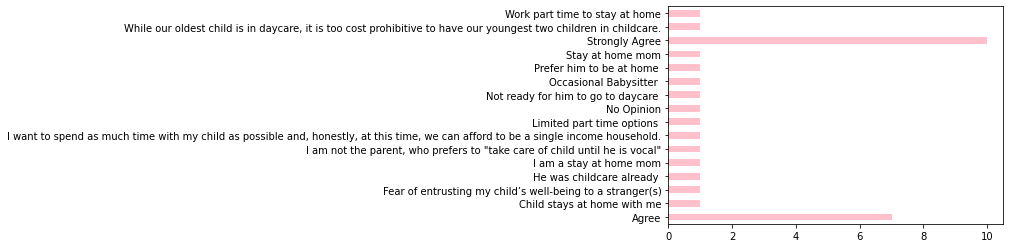

In [30]:
plotSection("x", 36, 37, pie=False, plotBars="x", plotBarsHoriz=True) 
'''Why have you not applied to day care?'''

'Where else have you sought child care'

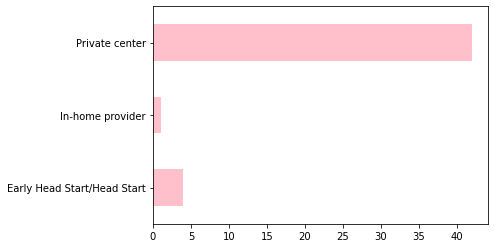

In [31]:
plotSection("y", 37, 38, pie=False, plotBars="y", plotBarsHoriz=True) 
'''Where else have you sought child care'''

In [ ]:
# '''cells left to possibly include'''
allIncoming.iloc[:, 39:]

In [23]:
allIncoming

,Date,What is your gender?,How old are you?,Which of the following race/ethnicity categories best describes you?,Unnamed: 4,How many adults (people 19 years or older including yourself) live in your household?,How many children (18 or younger) live in your household?,What is your zip code?,Unnamed: 8,"Please select the range that describes your household's average annual income (including wages, child support, government benefits/financial assistance)",What is the highest level of education you have completed?,How many children do you currently bring to the We PLAY Center?,How old is the child?,What is the child's gender?,What is your relationship to the child?,How old is the 1st child?,What is the 1st child's gender?,What is your relationship to the 1st child?,How old is the 2nd child?,What is the 2nd child's gender?,What is your relationship to the 2nd child?,How old is the 1st child?.1,What is the 1st child's gender?.1,What is your relationship to the 1st child?.1,How old is the 2nd child?.1,What is the 2nd child's gender?.1,What is your relationship to the 2nd child?.1,How old is the 3rd child?,What is the 3rd child's gender?,What is your relationship to the 3rd child?,Have you applied to a childcare program?,Which of the following are reasons that you have not applied for childcare? Please select all that apply.,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,What type of childcare program is it?,Are you currently on a waitlist for the childcare program you applied to?,How many times do you attend the We PLAY center in a typical month?,"""Overall...""",Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Please think about each statement and how you currently feel,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Think about each statement and how you currently feel .,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Do you have any comments about your first experience at the We PLAY Center?,Unnamed: 65,"Since attending the We PLAY Center, which of the following aspects of your child's development have changed? Please choose one option for each statement.",Unnamed: 67,Unnamed: 68,Unnamed: 69,"After coming to the center, which of the following aspects have changed for you as a parent? Please choose one option for each statement.",Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,"""The We PLAY Center...""",Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,"""The We PLAY Center has...""",Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,"""Since coming to We PLAY Center…""",Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,"""Since coming to the We PLAY Center I…""",Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,"""Since coming to We PLAY Center I…""",Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Please share any techniques or strategies you have learned from attending the We PLAY Center that you find most helpful as a parent (please provide a concrete example).,Which of the following aspects would you like the We Play Center to address more often? Please select all that apply and use the space to write in any additional comments.,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,What will keep you coming back to the We PLAY Center?,How did you find out about the We PLAY Center?,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Would you recommend the We PLAY Center to a family or friend?,Do you have any feedback on how the We PLAY Center can improve this Parent Reflection Form? Your feedback will used to modify this form and guide the development of future forms.,Are there any additional comments you would like to share with the We PLAY Center?,First Name,Last Name,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 9,Unnamed: 13,Unna

# Family Survey Data

##### Responses about the familes attending WePLAY
NOTE: this section must be read in order to avoid dropping bar graph columns

* FamilySurvey.xlsx data was collected between Jan-Aug 2019

In [ ]:
familySurveyDf = pd.read_excel(path + "FamilySurvey" + ".xlsx")

print("Notes: -- Adults means over 19  -- Children means under 18 -- Resp = Respondant\n")
adult_FDa = familySurveyDf.iloc[1:, :5]
adult_FDa.columns = [["Resp_Gender", "Resp_Age", "Resp_Race", "Children", "AdultsAtHome"]]
adult_FDb = familySurveyDf.iloc[1:, 5:10]
adult_FDb.columns = [["Zip", "OMIT", "Avg_Income", "highest_edu", "visits_Monthly"]]
adult_FDb.drop(columns=["OMIT"], inplace=True)#,level=level)


Zipcodes

In [ ]:
printCatBars(adult_FDb, "Zip", adult_FDb.Zip, False)

#### There is a wide distribution of ages of parents bringing their children to We Play but it is centered around the mid thirties


In [ ]:
printCatBars(adult_FDa, "Resp_Age", adult_FDa.Resp_Age)

#### Most households attending WePlay have two adults in them

In [ ]:
printCatBars(adult_FDa, "AdultsAtHome", adult_FDa.AdultsAtHome)

In [ ]:
# drop columns to plot bars
adult_FDa.drop(columns=["Resp_Age", "AdultsAtHome"], inplace=True)
labels=getLabels(adult_FDa)
plotPies(adult_FDa, labels, False, False, True)

adult_FDb.drop(columns=["Zip"], inplace=True) # drop columns to plot bars
labels=getLabels(adult_FDb)
plotPies(adult_FDb, labels, False, False, True)

Looking more closely at income, we see that most attendees make ??

** Need to re order these!! **

In [ ]:
printCatBars(adult_FDb, "Avg_Income", adult_FDb.Avg_Income, False)

## new section ??

#### Info about how parents found the we play center, showing the succesful usage of multiple channels for attracting familes
Word of mouth is WePlay's best advertisement, by far!

In [ ]:
how_found_WPC = familySurveyDf.iloc[1:, 10:17]
how_found_WPC.columns = ["Sign/Poster/flyer", "Friend", "Website", "Social Media", "Other org", "Laf-Fau Housing Office", "Other"]
plotPies(how_found_WPC, ["Yes", "No"], True, True)


#### Demographics of children that are brought to the weplay center

In [ ]:
child_FD = familySurveyDf.iloc[1:, 17:24] # combined 18/19 into 17 manually
child_FD.columns = ["Gender", "Age", "age2", "age3", "parent", "age4", "misc"]
child_FD.drop(columns=["age2", "age3", "age4", "misc", "parent"], inplace=True)
child_FD["Gender"][~(child_FD.Gender == 'Male' ) & ~(child_FD.Gender == 'Female')] = np.nan

labels=getLabels(child_FD)
plotPies(child_FD, labels, False, False)


### Parenting Skills

#### "Please share the number of days in a typical week that you engage in the following activities"

In [ ]:
daysActivitys_FD = familySurveyDf.iloc[1:, 24:27]
daysActivitys_FD.columns = ["Read Stories", "Play Music or Sing", 
                     "Engage in language building activities"]
labels = ['Never', 'Every day', '1-2 days', '3-6 days']

plotPies(daysActivitys_FD, labels, True, False)

In [ ]:
daysActivitys_FD = familySurveyDf.iloc[1:, 27:29]
daysActivitys_FD.columns = ['Engage in play', 'Create opportunities for your child to "practice" self control']
plotPies(daysActivitys_FD, getLabels(daysActivitys_FD), False, False)


#### Please state how strongly you agree with the following statements

In [ ]:
parenting_FD = familySurveyDf.iloc[1:, 29:34]
parenting_FD.columns = ['I respond quickly to my child\'s cries', 'I am able to comfort my child when he/she is upset',
 'I know the meaning of my child\'s signals (cry, turning away, rubbing eyes)',
 'I step back and encourage my child to work through problems',
 'I am able to follow my child\'s lead during playtime']
cols = parenting_FD.columns
labels = ['Mostly agree', 'Somewhat agree', 'neither agree nor disagree',
       'Strongly agree', 'Mostly disagree', 'Strongly disagree','Somewhat disagree']
plotPies(parenting_FD, labels, True, False)


#### Parents vary in how they discipline. Below are some strategies parents used to discipline their children during the last 7 days:

In [ ]:
discipline_FD = familySurveyDf.iloc[0:, 34:42]
discipline_FD.columns = ['Raising your voice or yelling', 'Spanked/Slapped', 'Took away a toy or treats', 'Positive Reinforcement', 'Offered choices', 'Time-out', 'Explained why his/her behavior is not appropriate', 'Recognized and regulated your feelings']
labels = ["Never", "Always", "Very Often", "Sometimes", "Rarely"]
plotPies(discipline_FD,  labels, True, False)

#### The We PLAY Center strives to create a welcoming environment with toys and caring, knowledgable staff. How well do parents think We Play meets these goals?

In [ ]:
environmentstatements_FD = familySurveyDf.iloc[1:, 42:48]
labels = ['Strongly agree','Strongly disagree', 'Mostly agree',
       'Neither disagree nor agree', 'Somewhat agree',
       'Somewhat disagree']
environmentstatements_FD.columns = familySurveyDf.iloc[0, 42:48]
plotPies(environmentstatements_FD, labels, True, False)

#### We Play strives to help parents and children grow. The questions below help to illustrate how well We Play is fulfilling those goals:

In [ ]:
attendance_feedback = familySurveyDf.iloc[1:, 48:53]
labels = ['Strongly agree','Strongly disagree', 'Mostly agree',
       'Neither disagree nor agree', 'Somewhat agree',
       'Somewhat disagree']
attendance_feedback.columns = familySurveyDf.iloc[0, 48:53]
plotPies(attendance_feedback, labels, True, False)

#### Below are written responses from families on what will keep them returning to the We Play Center. A commonality between many of the responses is the love for the staff at the WePlay Center.

In [ ]:
weplay_review = familySurveyDf.iloc[1:, 56:58]
labels = getLabels(weplay_review)
print("What will keep you coming back to the We PLAY Center?:\n")
print(labels[0][1:])

In [ ]:
print("What aspect of the We PLAY Center do you find most helpful?:\n")
print(labels[1][1:])

## Incoming Parent Reflections

moved up ^

### DF with incoming parent survey data for July 2019
** THIS IS A BUNCH AND WE CAN PROB GET MORE FROM THIS? **

In [ ]:
#incomingjuly2019

**Data about the child's parent or guardian.**

In [ ]:
#create df with information about adult bringing child in
adult_july2019 = incomingjuly2019[["What is your gender?","How old are you?","Which of the following race/ethnicity categories best describes you?","What is the highest level of education you have completed?","What is your relationship to the child?","How many times do you attend the We PLAY center in a typical month?"]]
#Rename columns 
adult_july2019.columns = [["Resp_Gender", "Resp_Age", "Resp_Race","highest_edu","Resp_relationship_to_child","visits_Monthly"]]
#drop unnessecary column with few data points
#adult_july2019.drop([0], axis=0, inplace = True)


# plotPies(adult_july2019, getLabels(adult_july2019), False, False)


**Data about the child's household.**

In [ ]:
#create df with info relating to child's household
householdinfo_july2019 = incomingjuly2019.iloc[0:, 5:10]
#Rename columns
householdinfo_july2019.columns = [["Adults", "Children", "Zip", "OMIT", "Avg_Income"]]
#Drop unessecary column with few data points
householdinfo_july2019.drop(columns=["OMIT"], inplace=True)
#drop unnesscary row with response parameters
householdinfo_july2019.drop([0], axis=0, inplace = True)
#householdinfo_july2019

plotPies(householdinfo_july2019, getLabels(householdinfo_july2019), False, False)

**Data about how parents found WPC.**

In [ ]:
## DF with info on how they found WPC
how_found_WPC_july2019 = incomingjuly2019.iloc[1:, 120:127]
how_found_WPC_july2019.columns = [["Sign/Poster/flyer", "Friend", "Website", "Social Media", "Other org", "Lafitte Fauborg Housing Office", "Other"]]
#~how_found_WPC_july2019.isna()  # Gives table of methods people used to find WPC

**Data about the childrens age and gender.**

In [ ]:
child_July2019 = incomingjuly2019.iloc[1:, 12:21]

child_July2019.columns = [["1st child age","1st child's gender","resp relationship to 1st child","2nd child age"," 2nd child's gender","resp relationship to 2nd child","3rd child age"," 3rd child's gender","resp relationship to 3rd child"]]                   

#child_July2019
## this just tells gender and age of children + age of child 2, age child three
# then relationship , relationship 2, other

**Data about why parents have not applied for childcare.**

In [ ]:
#create df with info about why parents have not applied for childcare
nochildcare_july2019 = incomingjuly2019.iloc[0:, 31:39]
#Rename columns
nochildcare_july2019.columns = [["It is too expensive", "I feel my child is not old enough", "There is a lack of quality childhood care and education","I use a nanny to care for my child", "I use a family member to care for my child","Other  (please specify)","Type of Program Applied for","Are you currently on a waiting list for a program?"]]
#Drop unessecary column with few data points
#householdinfo_july2019.drop(columns=["OMIT"], inplace=True)
#drop unnesscary row with response parameters
nochildcare_july2019.drop([0], axis=0, inplace = True)
nochildcare_july2019

**Data about parents interact with their children before and after WP.**

In [ ]:
#create df with directly comparable info about how parents interact with their children before and after WePlay
parent_child_behaviors_july2019 = incomingjuly2019[["Please think about each statement and how you currently feel","Unnamed: 52","Unnamed: 53","Unnamed: 54","Unnamed: 55","Unnamed: 56",'"Since coming to the We PLAY Center I…"',"Unnamed: 96","Unnamed: 97","Unnamed: 98","Unnamed: 99","Unnamed: 100"]]
#Rename columns
parent_child_behaviors_july2019.columns = [["Read to my child (Before WP)","Play with my child (Before WP)","Talk to my child (Before WP)", "Listen to my child (Before WP)","Set limits with my child (Before WP)","Yell at my child (Before WP)","Read to my child (Since WP)","Play with my child (Since WP)","Talk to my child (Since WP)","Listen to my child (Since WP)","Set limits with my child (Since WP)","Yell at my child (Since WP)"]]
#drop unnesscary row with response parameters
parent_child_behaviors_july2019.drop([0], axis=0, inplace = True)
#parent_child_behaviors_july2019

**Data about how parents feel they've grown since WP.**

In [ ]:
#create df with info about how parents feel they've grown since We Play
since_WP_Parents_july2019 = incomingjuly2019[["After coming to the center, which of the following aspects have changed for you as a parent? Please choose one option for each statement.","Unnamed: 71","Unnamed: 72","Unnamed: 73","Unnamed: 74","Unnamed: 75","Unnamed: 76",'"Since coming to We PLAY Center…"',"Unnamed: 90","Unnamed: 91","Unnamed: 92","Unnamed: 93","Unnamed: 94"]]
#Rename columns
since_WP_Parents_july2019.columns = [["My stress level as a parent...","My knowledge about parenting support and resources in the community...","My knowledge about my child’s development...","My knowledge about how to foster my child’s development...","My knowledge about nurturing and responsive parenting strategies...","My knowledge about nutrition and breastfeeding...","My confidence in my role as a parent...","I engage with my child by repeating his/her words or sounds...","I engage with my child in pretend play...","I stand back and let my child work through problems...","I engage in bonding activities with my child...","I am better able to help my child uses age appropriate social skills...","I am better able to support my child as he/she learns new skills..."]]
#drop unnesscary row with response parameters
since_WP_Parents_july2019.drop([0], axis=0, inplace = True)
#since_WP_Parents_july2019

**Data about how parents feel their children have grown since WP.**

In [ ]:
#create df with info about how parents feel their children have grown since We Play
since_WP_child_july2019 = incomingjuly2019[["Since attending the We PLAY Center, which of the following aspects of your child's development have changed? Please choose one option for each statement.","Unnamed: 58","Unnamed: 59","Unnamed: 60"]]
#Rename columns
since_WP_child_july2019.columns = [["My child's early learning and cognitive skills...","My child's early language abilities...","My child's early social emotional skills...", "My child's school readiness..."]]
#drop unnesscary row with response parameters
since_WP_child_july2019.drop([0], axis=0, inplace = True)
#since_WP_child_july2019

**Data about the parent's misc opinions on WP.**

In [ ]:
#create df with parent's other opinions on WePlay
other_WP_opinions_july2019 = incomingjuly2019[['"The We PLAY Center..."',"Unnamed: 79","Unnamed: 80","Unnamed: 81","Unnamed: 82",'"The We PLAY Center has..."',"Unnamed: 84","Unnamed: 85","Unnamed: 86","Unnamed: 87","Unnamed: 88"]]
#Rename columns
other_WP_opinions_july2019.columns = [["Provides an enriched learning environment, provides educational toys","Offers an adequate number of toys","Creates a positive welcoming friendly atmosphere", "Staff is knowledgeable and answer questions willingly","Staff is patient and empathetic","Been helpful to my family","Given me more confidence as a parent","Helped me to become a better parent","Provided me with positive parenting strategies","Supported me in my role as a parent/caregiver","Created a support system with other members of the We PLAY Center"]]
#drop unnesscary row with response parameters
other_WP_opinions_july2019.drop([0], axis=0, inplace = True)
#other_WP_opinions_july2019

**Data about what kind of information parents want more of from WP.**

In [ ]:
#create df with survey info about what kind of info parents want more of
desired_info_july2019 = incomingjuly2019[["Which of the following aspects would you like the We Play Center to address more often? Please select all that apply and use the space to write in any additional comments.","Unnamed: 109","Unnamed: 110","Unnamed: 111","Unnamed: 112","Unnamed: 113","Unnamed: 114","Unnamed: 115","Unnamed: 116","Unnamed: 117"]]
#Rename columns
desired_info_july2019.columns = [["Stress Relief","Information about community resources","Information about how to foster my child’s development", "Information about nurturing and responsive parenting strategies","Information about mouthing (biting, putting objects in their mouth)","Information about conflict resolution","Information about sharing","Information about nursing/ feeding","Information about temper tantrums","Information about sleeping"]]
desired_info_july2019 = ~desired_info_july2019.isna()

print('"Which of the following aspects would you like the We Play Center to address more often?\n')
plotPies(desired_info_july2019, ["True", "False"], True, False)

**Open response, what will keep people coming back to WP.**

In [ ]:
#create df with open response detailing what parents say will keep them coming back
keep_coming_back_july2019 = incomingjuly2019[["What will keep you coming back to the We PLAY Center?"]]
#drop unnesscary row with response parameters
#keep_coming_back_july2019.drop([0], axis=0, inplace = True)
#keep_coming_back_july2019

### DF with incoming parent survey data from Nov 2019

In [ ]:
'''#read in data for incoming parent relfections from july 2019
incomingnov2019 = pd.read_excel(path + "IncomingParentReflection-November2019" + ".xlsx")
#display all columns
pd.set_option('display.max_columns',None)

#incomingnov2019.head(3)'''

**Data about the child's parent or guardian.**

In [ ]:
'''#create df with information about adult bringing child in
adult_nov2019 = incomingnov2019[["What is your gender?","How old are you?","Which of the following race/ethnicity categories best describes you?","What is the highest level of education you have completed?","What is your relationship to the child?","How many times do you attend the We PLAY center in a typical month?"]]
#Rename columns 
adult_nov2019.columns = [["Resp_Gender", "Resp_Age", "Resp_Race","highest_edu","Resp_relationship_to_child","visits_Monthly"]]
#adult_nov2019'''

**Data about the child's household.**

In [ ]:
'''#create df with info relating to child's household
householdinfo_nov2019 = incomingnov2019.iloc[0:, 10:15]
#Rename columns
householdinfo_nov2019.columns = [["Adults", "Children", "Zip", "OMIT", "Avg_Income"]]
#Drop unessecary column with few data points
householdinfo_nov2019.drop(columns=["OMIT"], inplace=True)
#drop unnesscary row with response parameters
#householdinfo_nov2019.drop([0], axis=0, inplace = True)
#householdinfo_nov2019'''

**Data about how parents found WPC.**

In [ ]:

## DF with info on how they found WPC
#how_found_WPC_nov2019 = incomingnov2019.iloc[1:, 127:136]
how_found_WPC_nov2019.columns = [["Sign/Poster/flyer", "Friend","Family", "Website", "Social Media", "Other org", "Lafitte Fauborg Housing Office", "We PLAY Center Staff","Other"]]

#~how_found_WPC_nov2019.isna()  # Gives table of methods people used to find WPC

**Data about the childrens age and gender.**

In [ ]:
child_nov2019 = incomingnov2019.iloc[1:, 17:33]
child_nov2019.drop(["Unnamed: 20","How old is the 1st child?.1","What is the 1st child's gender?","What is your relationship to the 1st child?","Unnamed: 24","How old is the 1st child?","What is the 1st child's gender?","What is your relationship to the 1st child?.1"], axis=1, inplace = True)
child_nov2019.columns = [["1st child age","1st child's gender","1st resp relationship to child","2nd child age"," 2nd child's gender","resp relationship to 2nd child","3rd child age"," 3rd child's gender","resp relationship to 3rd child"]]                   
#child_nov2019

## this just tells gender and age of children + age of child 2, age child three
# then relationship , relationship 2, other

**Data about why parents have not applied for childcare.**

In [ ]:
#create df with info about why parents have not applied for childcare
nochildcare_nov2019 = incomingnov2019.iloc[0:, 34:42]
#Rename columns
nochildcare_nov2019.columns = [["It is too expensive", "I feel my child is not old enough", "There is a lack of quality childhood care and education","I use a nanny to care for my child", "I use a family member to care for my child","Other  (please specify)","Type of Program Applied for","Are you currently on a waiting list for a program?"]]

# nochildcare_nov2019

updated for all **Data about parents interact with their children before and after WP.**

KEYS:
1. Read to my child (Before WP)
2. Play with my child (Before WP)
3. Talk to my child (Before WP)
4. Listen to my child (Before WP)
5. Set limits with my child (Before WP)
6. Yell at my child (Before WP)
7. Read to my child (Since WP)
8. Play with my child (Since WP)
9. Talk to my child (Since WP)
10. Listen to my child (Since WP)
11. Set limits with my child (Since WP)
12. Yell at my child (Since WP)


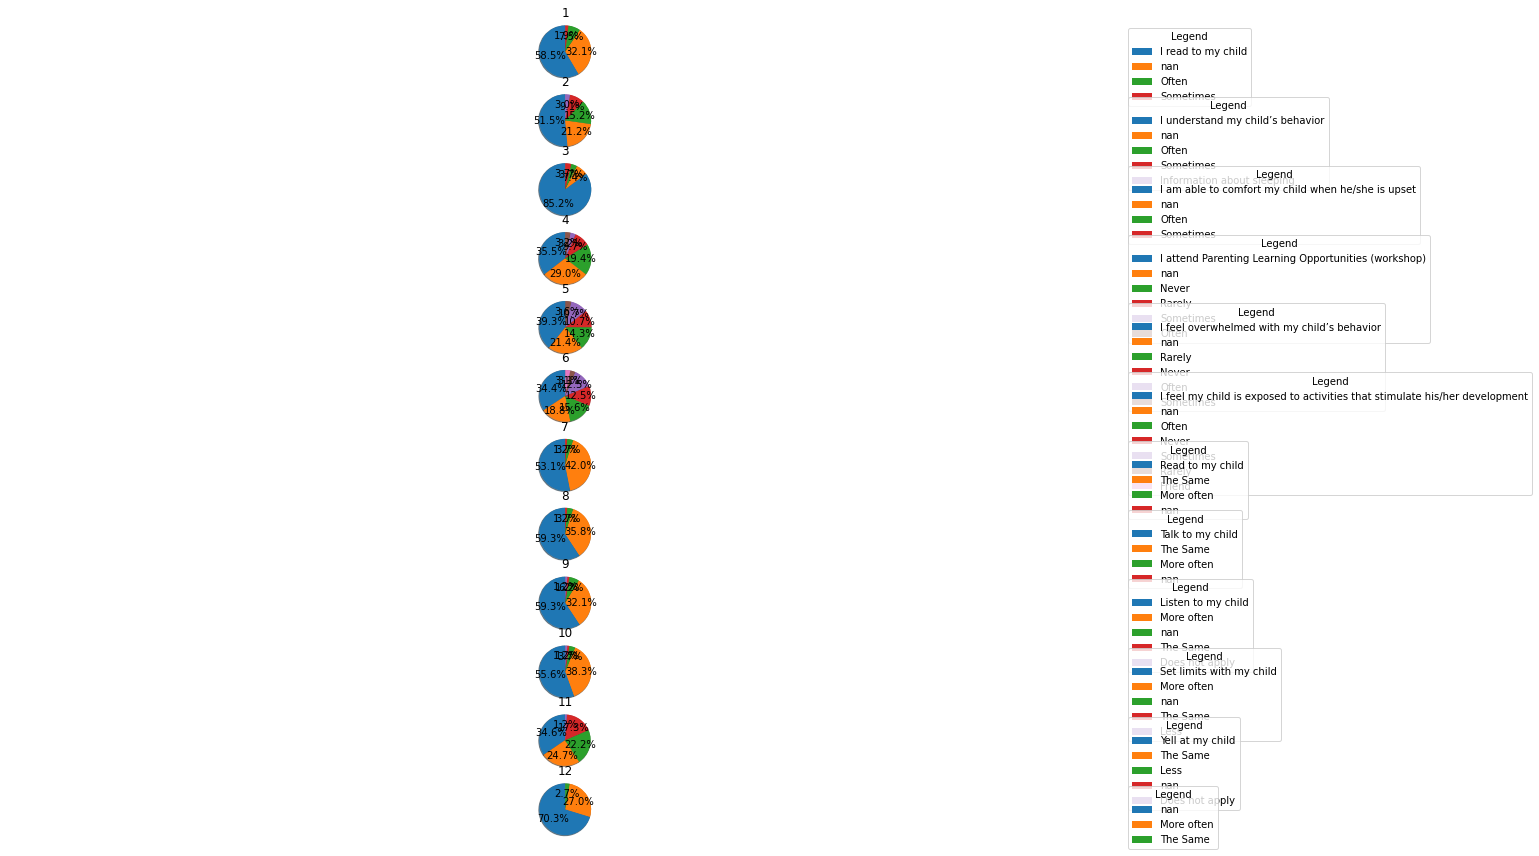

In [84]:
#create df with directly comparable info about how parents interact with their children before and after WePlay
parent_child_behaviors = allIncoming[["Please think about each statement and how you currently feel","Unnamed: 59","Unnamed: 60","Unnamed: 61","Unnamed: 62","Unnamed: 63",'"Since coming to the We PLAY Center I…"',"Unnamed: 97","Unnamed: 98","Unnamed: 99","Unnamed: 100","Unnamed: 101"]]
#Rename columns
parent_child_behaviors.columns = [["Read to my child (Before WP)","Play with my child (Before WP)","Talk to my child (Before WP)", "Listen to my child (Before WP)","Set limits with my child (Before WP)","Yell at my child (Before WP)","Read to my child (Since WP)","Play with my child (Since WP)","Talk to my child (Since WP)","Listen to my child (Since WP)","Set limits with my child (Since WP)","Yell at my child (Since WP)"]]

plotPies(parent_child_behaviors, getLabels(parent_child_behaviors), False, False, ishoriz=False)

**Data about how parents feel they've grown since WP.**

In [ ]:
#create df with info about how parents feel they've grown since We Play
since_WP_Parents_nov2019a = incomingnov2019[["After coming to the center, which of the following aspects have changed for you as a parent? Please choose one option for each statement.","Unnamed: 78","Unnamed: 79","Unnamed: 80","Unnamed: 81","Unnamed: 82","Unnamed: 83"]]
since_WP_Parents_nov2019b = incomingnov2019[['"Since coming to We PLAY Center…"',"Unnamed: 97","Unnamed: 98","Unnamed: 99","Unnamed: 100","Unnamed: 101"]]
# Rename columns
since_WP_Parents_nov2019a.columns = [["My stress level as a parent...","My knowledge about parenting support and resources in the community...","My knowledge about my child’s development...","My knowledge about how to foster my child’s development...","My knowledge about nurturing and responsive parenting strategies...","My knowledge about nutrition and breastfeeding...","My confidence in my role as a parent..."]]
since_WP_Parents_nov2019b.columns =[["I engage with my child by repeating his/her words or sounds...","I engage with my child in pretend play...","I stand back and let my child work through problems...","I engage in bonding activities with my child...","I am better able to help my child uses age appropriate social skills...","I am better able to support my child as he/she learns new skills..."]]
# plot seperately so labeling is nic

plotPies(since_WP_Parents_nov2019a, ["Increased significantly", "Somewhat decreased"], True, True)
plotPies(since_WP_Parents_nov2019b, ["More often", "The same"], True, True)



**Data about how parents feel their children have grown since WP.**

In [ ]:
#create df with info about how parents feel their children have grown since We Play
since_WP_child_nov2019 = incomingnov2019[["Since attending the We PLAY Center, which of the following aspects of your child's development have changed? Please choose one option for each statement.","Unnamed: 74","Unnamed: 75","Unnamed: 76"]]
#Rename columns
since_WP_child_nov2019.columns = [["My child's early learning and cognitive skills...","My child's early language abilities...","My child's early social emotional skills...", "My child's school readiness..."]]
#drop unnesscary row with response parameters
#since_WP_child_nov2019.drop([0], axis=0, inplace = True)
#since_WP_child_nov2019

updated for all -- **Data about the parent's misc opinions on WP.**

In [78]:
#create df with parent's other opinions on WePlay
other_WP_opinions = allIncoming[['"The We PLAY Center..."',"Unnamed: 86","Unnamed: 87","Unnamed: 88","Unnamed: 89",'"The We PLAY Center has..."',"Unnamed: 91","Unnamed: 92","Unnamed: 93","Unnamed: 94","Unnamed: 95"]]
#Rename columns
other_WP_opinions.columns = [["Provides an enriched learning environment, provides educational toys","Offers an adequate number of toys","Creates a positive welcoming friendly atmosphere", "Staff is knowledgeable and answer questions willingly","Staff is patient and empathetic","Been helpful to my family","Given me more confidence as a parent","Helped me to become a better parent","Provided me with positive parenting strategies","Supported me in my role as a parent/caregiver","Created a support system with other members of the We PLAY Center"]]
#drop unnesscary row with response parameters

#plotPies(other_WP_opinions, ["Strongly agree", "Neutral", "No opinion"], True, False)
    

UPDATED for all: **Data about what kind of information parents want more of from WP.**

In [76]:
#desired_info_nov2019
#~desired_info_nov2019.isna()

#create df with survey info about what kind of info parents want more of
desired_info = allIncoming[["Which of the following aspects would you like the We Play Center to address more often? Please select all that apply and use the space to write in any additional comments.","Unnamed: 116","Unnamed: 117","Unnamed: 118","Unnamed: 119","Unnamed: 120","Unnamed: 121","Unnamed: 122","Unnamed: 123","Unnamed: 124"]]
#Rename columns
desired_info.columns = [["Stress Relief","Information about community resources","Information about how to foster my child’s development", "Information about nurturing and responsive parenting strategies","Information about mouthing (biting, putting objects in their mouth)","Information about conflict resolution","Information about sharing","Information about nursing/ feeding","Information about temper tantrums","Information about sleeping"]]


# plotPies(desired_info, ["Strongly agree", "Neutral", "No opinion"], True, False)
    

updated for all --**Open response, what will keep people coming back to WP.**

In [79]:
#create df with open response detailing what parents say will keep them coming back
keep_coming_back = allIncoming[["What will keep you coming back to the We PLAY Center?"]]

#keep_coming_back

### DF with incoming parent survey data from 2020

In [ ]:

# incoming2020.head(1)

In [ ]:
incoming2020caregiver = incoming2020[["What is your gender?", "How old are you?", "Which of the following race/ethnicity categories best describes you?","Please select the range that describes your household's average annual income (including wages, child support, government benefits/financial assistance)", "What is the highest level of education you have completed?"]]
incoming2020caregiver

plotPies(incoming2020caregiver, getLabels(incoming2020caregiver), False, False, False)
    

**Data about the child's parent or guardian.**

In [ ]:
'''#create df with information about adult bringing child in
adult_2020 = incoming2020[["What is your gender?","How old are you?","Which of the following race/ethnicity categories best describes you?","What is the highest level of education you have completed?","What is your relationship to the child?"]]
#Rename columns 
adult_2020.columns = [["Resp_Gender", "Resp_Age", "Resp_Race","highest_edu","Resp_relationship_to_child"]]
#delete row full of test reponses
#adult_2020.drop([0], axis=0, inplace = True)
#adult_2020'''

**Data about the child's household.**

In [ ]:
'''#create df with info relating to child's household
householdinfo_2020 = incoming2020.iloc[0:, 4:9]
#Rename columns
householdinfo_2020.columns = [["Adults", "Children", "Zip", "OMIT", "Avg_Income"]]
#Drop unessecary column with few data points
householdinfo_2020.drop(columns=["OMIT"], inplace=True)
#drop unnesscary row with response parameters
#householdinfo_nov2019.drop([0], axis=0, inplace = True)
#householdinfo_2020'''

**Data about how parents found WPC.**

In [ ]:
## DF with info on how they found WPC
how_found_WPC_2020 = incoming2020[["How did you find out about the We PLAY Center?"]]
#how_found_WPC_2020

**Data about the childrens age and gender.**

In [ ]:
child_2020 = incoming2020[["How old is the 1st child?","What is the 1st child's gender?","What is your relationship to the 1st child?","How old is the 2nd child?","What is the 2nd child's gender?","What is your relationship to the 2nd child?"]]
child_2020.columns = [["1st child age","1st child's gender","resp relationship to 1st child","2nd child age"," 2nd child's gender","resp relationship to 2nd child"]]                   
#child_2020

## this just tells gender and age of children + age of child 2, age child three
# then relationship , relationship 2, other

**Data about why parents have not applied for childcare.**

In [ ]:
#create df with info about why parents have not applied for childcare
nochildcare_2020 = incoming2020.iloc[0:, 21:24]
#Rename columns
#nochildcare_2020.columns = [["It is too expensive", "I feel my child is not old enough", "There is a lack of quality childhood care and education","I use a nanny to care for my child", "I use a family member to care for my child","Other  (please specify)","Type of Program Applied for","Are you currently on a waiting list for a program?"]]

#nochildcare_2020

**Data about parents interact with their children.**

In [ ]:
#create df with info about how parents interact with their children currently, Unfortunate they did not maintain the before and after WP
parent_child_behaviors_2020 = incoming2020[["Please think about each statement and how you currently feel","Unnamed: 36","Unnamed: 37","Unnamed: 38","Unnamed: 39","Unnamed: 40"]]
#Rename columns
parent_child_behaviors_2020.columns = [["Read to my child (Currently)","Play with my child (Currently)","Talk to my child (Currently)", "Listen to my child (Currently)","Set limits with my child (Currently)","Yell at my child (Currently)"]]

#parent_child_behaviors_2020

**Data about how parents currently feel about their parenting skills and a few misc opinions**

In [ ]:
#create df with info about how parents feel they've grown since We Play
currently_Parents_feel_2020 = incoming2020[["Think about each statement and how you currently feel .","Unnamed: 42","Unnamed: 43","Unnamed: 44","Unnamed: 45","Unnamed: 46","Unnamed: 47",'"Overall..."',"Unnamed: 25","Unnamed: 26","Unnamed: 27","Unnamed: 28","Unnamed: 29","Unnamed: 30","Unnamed: 31","Unnamed: 32","Unnamed: 33","Unnamed: 34"]]
#Rename columns
currently_Parents_feel_2020.columns = [["I stress about parenting...","I use positive parenting strategies...","I understand my child’s behavior...","I am able to comfort my child when he/she is upset...","I attend Parenting Learning Opportunities (workshop)...","I feel overwhelmed with my child’s behavior...","I feel my child is exposed to activities that stimulate his/her development...","I feel confident as a parent","I have access to resources to become a better parent","I want to learn strategies to improve my parenting skills","I understand child development","I know age appropriate expectations for my child","I know how to foster my child’s development","I am knowledgeable about positive and nurturing parenting strategies","I utilize positive parenting strategies","I am supported in my role as a parent/caregiver","I have a support system that consist of families with children of similar ages as my child","I spend time with my child doing what he/she likes to do."]]

#currently_Parents_feel_2020

**Data about what kind of information parents want more of from WP.**

In [ ]:
#create df with survey info about what kind of info parents want more of
desired_info_2020 = incoming2020[["Which of the following aspects would you like the We Play Center to address? Please select all that apply and use the space to write in any additional comments.","Unnamed: 51","Unnamed: 52","Unnamed: 53","Unnamed: 54","Unnamed: 55","Unnamed: 56","Unnamed: 57","Unnamed: 58","Unnamed: 59"]]
#Rename columns
desired_info_2020.columns = [["Stress Relief","Information about community resources","Information about how to foster my child’s development", "Information about nurturing and responsive parenting strategies","Information about mouthing (biting, putting objects in their mouth)","Information about conflict resolution","Information about sharing","Information about nursing/ feeding","Information about temper tantrums","Information about sleeping"]]
desired_info_2020
#~desired_info_2020.isna()

**Open response, what will keep people coming back to WP.**

In [ ]:
#create df with open response detailing what parents say will keep them coming back
keep_coming_back_2020 = incoming2020[["What will keep you coming back to the We PLAY Center?"]]

#keep_coming_back_2020

# Automatic updating for Git Pages
Use gh-pages branch to display on Rena's personal website

In [ ]:
# # make sure to push changes from main first!
# !git checkout gh-pages
!git pull #update gh-pages with stuff from main

### automatically create index.html

In [ ]:
# convert this file to HTML
!jupyter nbconvert --to html FinalTutorial.ipynb

# Delete old index.html
!rm index.html
# move MilestoneTwo.html to index.html
!mv FinalTutorial.html index.html

# Push to Rena's repo
!git config --global user.name "renarepenning"
!git config --global user.email "rrepenning@tulane.edu"
!git add -A
!git commit -m "auto update index.html"

# !git push
# must push manually!

Make sure to checkout main before going back to work!